<a href="https://colab.research.google.com/github/PaVasForce/myForce/blob/master/keras_course_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/kdiamantaras2.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
<td>
<p>Konstantinos Diamantaras</p>
<p>Department of Information and Electronic Engineering</p>  
<p>International Hellenic University</p>  
<p>Greece</p>
</td>
<td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/International_Hellenic_University_logo.jpg" alt="Kostas Diamantaras" height="100"/>
</td>
</table>

# Implement a simple Multi-Layer Perceptron model  
<ul>
<li> Use Core layers: <code>Input</code>, <code>Dense</code>, <code>Flatten</code></li>
<li> Build and train the model</li>
<li> Predict test patterns</li>
<li> Dataset: <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a></li>
</ul>

### **Introduction: Tensors**  
Implement tensors using numpy arrays. **numpy arrays = tensors**.  
Make an n-d array applying the function `numpy.array()` on a n-d list  
Get the shape of a n-d array using the `.shape()` method

In [ ]:
import numpy as np

# 0 dimensional tensor = number
n = 3
print('n={}'.format(n))
# 1 dimensional tensor (=vector)
a = np.array([3, -6.1, 4.2])
print('a shape = {}'.format(a.shape))

# 2 dimensional tensor (=matrix)
b = np.array([[3, -6.1, 4.2],
              [-2.7, -8.5, 9]])
print('b shape = {}'.format(b.shape))

# 3 dimensional tensor = 3-d array
c = np.array([[[3, -6.1, 4.2],
               [-2.7, -8.5, 9]],
              [[-5.6, -1.4, 2],
               [3, 0.1, 0.7]],
              [[2.2, 0.1, -2.4],
               [-1.5, -0.5, 1.8]],
              [[-0.6, 4.4, -8],
               [1.3, -0.3, 6.7]]])
print('c shape = {}'.format(c.shape))

n=3
a shape = (3,)
b shape = (2, 3)
c shape = (4, 2, 3)


### **Keras Layers**  
A layer is a python object that receives an n-d tensor `x` as input and returns an m-d tensor `y` as output.  
General usage:  
<code>y = *&lt;Layer_constructor&gt;*(*&lt;parameters&gt;*)(x)</code>

In [ ]:
import tensorflow.keras.backend as K

#### Delete previous model, if one exists, to avoid memory leak

In [ ]:
try:
    K.clear_session()
    del model
    print('Model deleted')
except:
    print('No model to delete')

No model to delete


#### Input layer (see [Core layers](https://keras.io/layers/core/))  
The input layer simply creates a tensor with shape `(None, n2, n3, ..., nk)`.
The first dimension is unspecified because if corresponds to the <code>*&lt;batch_size&gt;*</code> which is currently an unknown number.
It will be specified when we use the network for training, prediction or evaluation.  
For example:


In [ ]:
from tensorflow.keras.layers import Input

x_in = Input(shape=[28,28])    # Create a Tensor with shape [?, 28, 28] x_in = Input(shape=[255,255]) 
print(x_in)

Tensor("input_1:0", shape=(None, 28, 28), dtype=float32)


> Keras `Tensor` class:  
the object `x_in` is an instance of the `Tensor` class which wraps `numpy.array` with some extra functionality.  

#### Flatten layer (see [Core layers](https://keras.io/layers/core/))  
Takes a k-dimensional input tensor of shape `[None, n2, n3, ..., nk]` and reshapes it into a 2-dimensional tensor of shape `[None, n2*...*nk]`. For example, the following code reshapes the `[None,28,28]` tensor `x_in` into the 2-d tensor `x_flat` with dimensions `[None,784]`:

In [ ]:
from tensorflow.keras.layers import Flatten

x_flat = Flatten()(x_in)  # κανει δυδσιάστατο.. none, 784 28*28dhladh. prepei na ginei ayto gia na mpei sto neyroniko
print(x_flat.shape)

(None, 784)


#### Dense layer (see [Core layers](https://keras.io/layers/core/))  
The dense layer implements a fully connected neural layer with $n$ inputs and $m$ outputs.  
<table><tr><td>
<img src="https://people.iee.ihu.gr/~kdiamant/images/Dense_layer.png" alt="Dense layer" height="150"/>
</td><td>
<p>$\mathbf{y} = f( \mathbf{xW} + \mathbf{b} )$</p>
<p>$f$: activation function</p>
<p>$W$: $n\times m$ weight matrix</p>
<p>$b$: $m$-dimensional bias vector</p>
</td></tr></table>

It assumes that the input tensor `x` is 2-d with shape `(None,n)`.
Again the first dimension is unspecified because it corresponds to the unknown `batch_size`.
In other words `x` is a matrix whose rows correspond to patterns and columns correspond to features.
You may specify the number of inputs using the parameter `input_shape=(n,)`.
You can skip this parameter if you specify the tensor `x` in which case the dimension `n` will be infered from it.  
The output dimension `m` must be passed to the layer constructor as a parameter.
This is mandatory.  
The dimension of the output tensor `y` is `(None,m)`.  
You may also set the activation function of the neurons.
If not set, the activation is by default linear. Possible activation functions include:
* `'relu'`: $relu(a) = 0$ if $a<0$, else $a$ if $a\geq 0$  
* `'softmax'`, $z = softmax(a)$, $z_i = \frac{exp(a_i)}{\Sigma_j exp(a_j)}$ 
* `'sigmoid'`, $sigmoid(a) = \frac{1}{1+exp(-a)}$  
* `'tanh'`: $tanh(a) = \frac{exp(a)-exp(-a)}{exp(a)+exp(-a)}$  
For example:  

In [ ]:
from tensorflow.keras.layers import Dense

"""
Define a dense layer with
    output units = 32 
    input tensor = x_flat
    activation function = relu
"""
y = Dense(32, activation='relu')(x_flat)      # First dense layer
print(y)    # shape = [None, 32]

Tensor("dense_1/Identity:0", shape=(None, 32), dtype=float32)


Add more layers to the network

In [ ]:
y = Dense(64, activation='relu')(y)         # Second dense layer (64 outputs units)
y = Dense(96, activation='relu')(y)         # Third dense layer (96 output units)
out = Dense(10, activation='softmax')(y)    # Output layer = Fourth dense layer

out = [0, 0.1, 0, 0, 0.9, 0, 0, 0, 0, 0] --> class 5 with probability 0.9

#### Build a keras [Model](https://keras.io/models/model/)  
Build the model by specifying the input tensor `x_in` and the output tensor `out`:

In [ ]:
from tensorflow.keras.models import Model

model = Model(inputs=x_in, outputs=out)

#### Compile the model  
Prepare the model for training using the method `.compile()`. With this method we specify:  

* The loss function `loss`. Typical loss functions include:  
  > `'mean_squared_error'`:  $loss(\mathbf{y},\mathbf{t}) = \sum_{p=1}^N \sum_{i=1}^m (y_{pi} - t_{pi})^2$ where  
    $y_{pi}$ is the $i$-th model output for the $p$-th pattern  
    $t_{pi}$ is the target for the $i$-th output for the $p$-th pattern  

  > `'categorical_crossentropy'`: $loss(\mathbf{y},\mathbf{t}) = -\sum_{p=1}^N \sum_{i=1}^m \log(y_{pi}) t_{pi}$ where  
    $y_{pi}$ and $t_{pi}$ as before, except that we must have $0\leq y_{pi} \leq 1$ and also, for all patterns $p$, $[t_{p1}, t_{p2}, ..., t_{pm}]$ must be a binary one-hot vector  

  > `'sparse_categorical_crossentropy'`: $loss(\mathbf{y},\mathbf{t}) = -\sum_{p=1}^N \sum_{i=1}^m \log(y_{pi}) onehot_{pi}$ where  
    $y_{pi}$ as before, and $t_{pi}$ is an integer representing the class label for pattern $p$. Then $onehot_p$ is an one-hot vector of size `number_of_classes` corresponding to the label $t_{pi}$  

  > For more details see [keras losses](https://keras.io/losses/)  

* The optimizer algorithm to be used.  
> Stochastic Gradient Descent: `SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)`  
> Adam optimizer: `Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)`  
> For more details see [keras optimizers](https://keras.io/optimizers/)  

* List of metrics to display while training the model. Typical metrics include  
> `'accuracy'`  
> `'mae'` (Mean Absolute Error)  
> `'mse'` (Mean Squared Error)  
> For more details see [keras metrics](https://keras.io/metrics/)  

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

#### Model summary  
Print model details in human readable format

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 96)                6240      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                970       
Total params: 34,442
Trainable params: 34,442
Non-trainable params: 0
_______________________________________________________

#### Load dataset for training  
The MNIST dataset is a benchmark for handwritten digit recongition. It consists of 4 tensors:
> `x_train`: tensor with shape (60000, 28, 28). Contains 60000 training images of size 28 $\times$ 28 pixels  
> `t_train`: tensor with shape (60000). Contains 60000 training image labels  
> `x_test`: tensor with shape (10000, 28, 28). Contains 10000 test images of size 28 $\times$ 28 pixels  
> `t_test`: tensor with shape (10000). Contains 10000 test image labels  

MNIST can be loaded using the built in function `keras.datasets.mnist.load_data()`

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
print('x_train.shape = ', x_train.shape)
print('t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape)
print('t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)
t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
t_test.shape =  (10000,)


#### Train the model  
Use the `.fit(x, y, batch_size, epochs, validation_data, verbose, ...)` method to train the model. Main parameters:  
* `x`: numpy array containing the training patterns. Rows are patterns, columns are features.  
* `y`: numpy array containing the training targets. Make sure that the format of the array fits the `loss` that was used when you compiled the model
* `batch_size`: the data are fed into the optimization algorithm in batches, ie. in small groups of *B* patterns at a time. `batch_size`=*B*.
* `validation_data`: a pair of numpy arrays containing the testing patterns and the testing targets.
* `max_epochs`: maximum number of epochs used for training. An epoch of training is completed when all the patterns are presented to the algorithm once.
* `verbose`: level of detailed feedback given by the algorithm during training. `verbose=0` gives no feedback.

In [ ]:
max_epochs = 50
batch_size = 100
#number of batches = 60000/100 = 600

history = model.fit(x=x_train, y=t_train,
                    validation_data=(x_test,t_test),
                    batch_size=batch_size,
                    epochs=max_epochs,
                    verbose=1)

Epoch 1/50
600/600 [==============================] - 2s 3ms/step - loss: 1.3640 - accuracy: 0.7251 - val_loss: 0.4517 - val_accuracy: 0.8727
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3879 - accuracy: 0.8918 - val_loss: 0.3375 - val_accuracy: 0.9068
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2855 - accuracy: 0.9193 - val_loss: 0.2815 - val_accuracy: 0.9283
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2385 - accuracy: 0.9331 - val_loss: 0.2617 - val_accuracy: 0.9318
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2161 - accuracy: 0.9388 - val_loss: 0.2437 - val_accuracy: 0.9337
Epoch 6/50
600/600 [==============================] - 2s 4ms/step - loss: 0.1973 - accuracy: 0.9431 - val_loss: 0.2136 - val_accuracy: 0.9430
Epoch 7/50
600/600 [==============================] - 2s 4ms/step - loss: 0.1798 - accuracy: 0.9474 - val_loss: 0.2009 - val_accuracy: 0.9466
Epoch 

#### Plot the training and testing performance

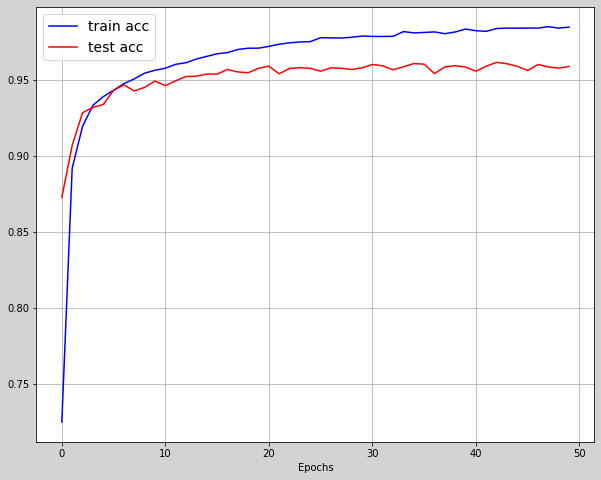

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('lightgray')
plt.plot(history.history['accuracy'], 'b')
plt.plot(history.history['val_accuracy'], 'r')
plt.legend(['train acc', 'test acc'], fontsize=14)
plt.xlabel('Epochs')
plt.grid(b=True)

#### Predict test images  
Use the function `.predict()` to predict the class of test images.
Since the model has 10 outputs with the softmax acitvation, the $i$-th output corresponds to the probability of the input image belonging to class $i$.
The predicted class label is the index $j$ of the neuron with the highest probability.
The class label is computed with the `argmax()` function of the numpy package (see [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)).

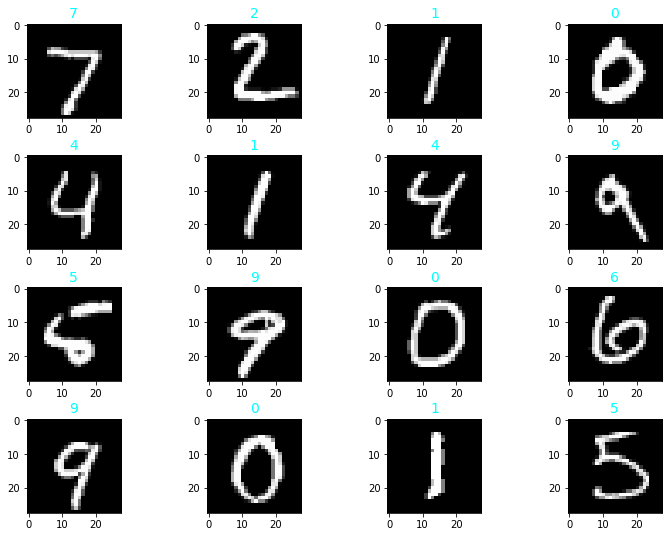

In [ ]:
prob_pred = model.predict(x_test, batch_size=batch_size)
label_pred = np.argmax(prob_pred, axis=1)
plt.figure(figsize=(12,9))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(16):
    axes = plt.subplot(4,4,i+1)
    if label_pred[i]==t_test[i]:
        color = 'cyan'
    else:
        color = 'red'
    axes.set_title(label_pred[i], fontdict={'fontsize':14, 'color':color})
    plt.imshow(x_test[i], cmap=plt.gray())